In [1]:
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import splprep, splev
import math
import copy

import winsound
%matplotlib notebook

In [2]:
%run "C:\SBU-3\Jupyter-Research\RSCR\Functions.ipynb"

# Clean Dataset (Remove Opened Ones)

In [3]:
# Import data
mec_data_raw = np.load('C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\TEST\\mec_data_120.npy');
path_data_raw = np.load('C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\TEST\\path_data_120.npy');

print(len(mec_data_raw))

path_data, mec_data = RemoveOpen (path_data_raw, mec_data_raw)
print(len(mec_data))

3086
3086


In [ ]:
#save cleaned data
np.save("C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\TEST\\mec_data_120.npy",mec_data) # n*9*3
np.save("C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\TEST\\path_data_120.npy",path_data) #n*3*100

In [ ]:
mec_data[0]

# Randomly Plot

In [4]:
# Import data
mec_data = np.load("C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\TEST\\mec_data_120.npy");
path_data= np.load("C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\TEST\\path_data_120.npy");
#path_data2 = np.load("C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\3_555_Different_Ratio\\3_Path_555.npy");

In [5]:
# Normalize Mechanism
def temp_normalizeMec(omec):    
    #Scaling
    mec = copy.deepcopy(omec)
    mec[0,:] = mec[0,:]/3
    mec[1,:] = mec[1,:]/3
    mec[2,:] = mec[2,:]/3
    mec[5,:] = mec[5,:]/3
    mec[6,:] = mec[6,:]/3
    mec[8,:] = mec[8,:]/3
    
    return mec

mec_data = np.load("C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\3_555_Different_Ratio\\4_Mec_555_7p.npy");

path_data= np.load("C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\3_555_Different_Ratio\\4_Path_555.npy");

planar_inx = []
for i in range(len(mec_data)):
    if np.sum(abs(mec_data[i,0:2,2]))+np.sum(abs(mec_data[i,3:5,2]))+np.sum(abs(mec_data[i,6,2])) and  np.sum(abs(mec_data[i,2,0:2]))+np.sum(abs(mec_data[i,5,0:2]))< 1e-4:
        planar_inx.append(i)

<IPython.core.display.Javascript object>


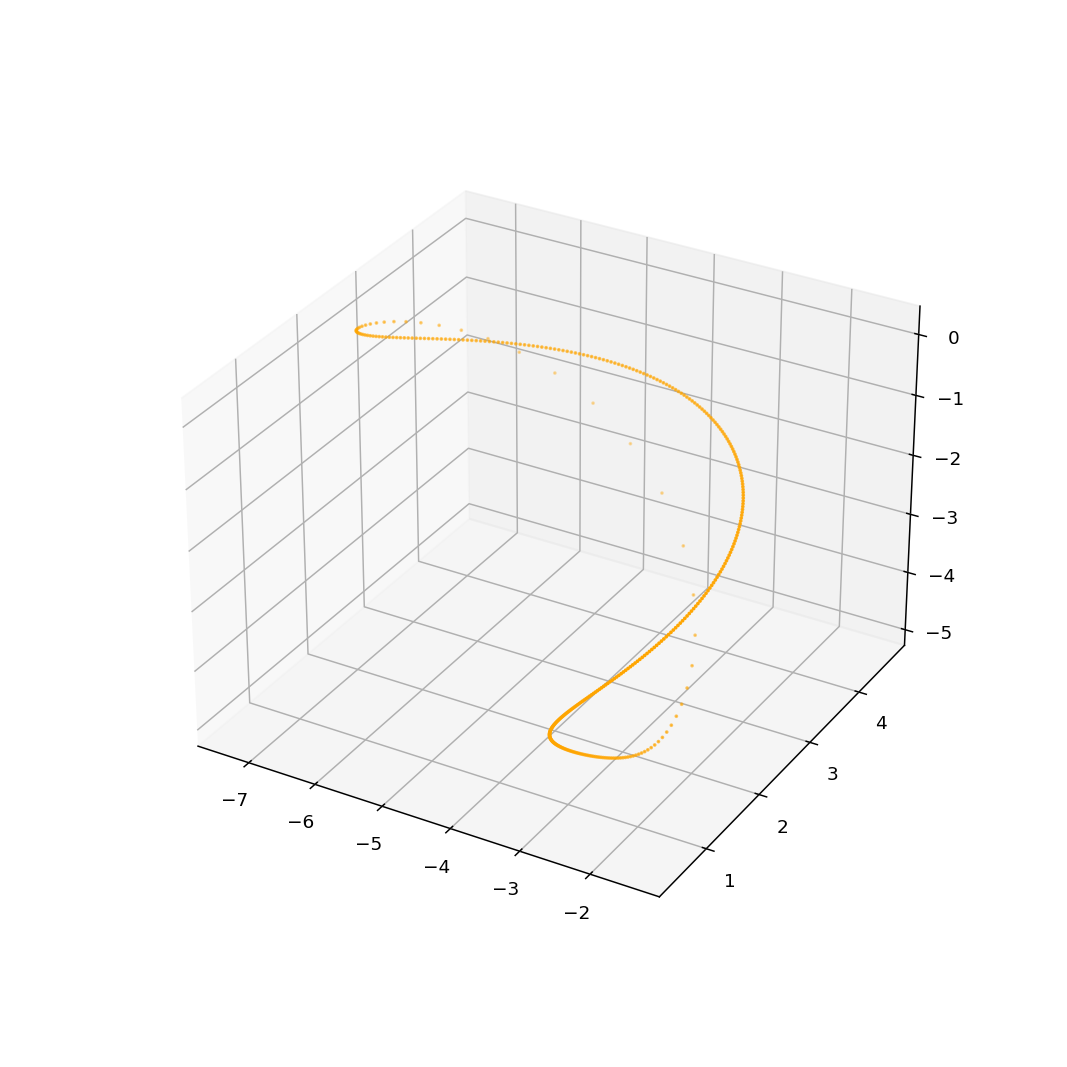

2163


In [9]:
# random plot a mec and it's path
rand_show = np.random.randint(len(path_data))
fig= plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1, projection='3d')
plotPath(path_data[rand_show],color = 'orange',linestyle = 'point1')
print(rand_show)

<IPython.core.display.Javascript object>


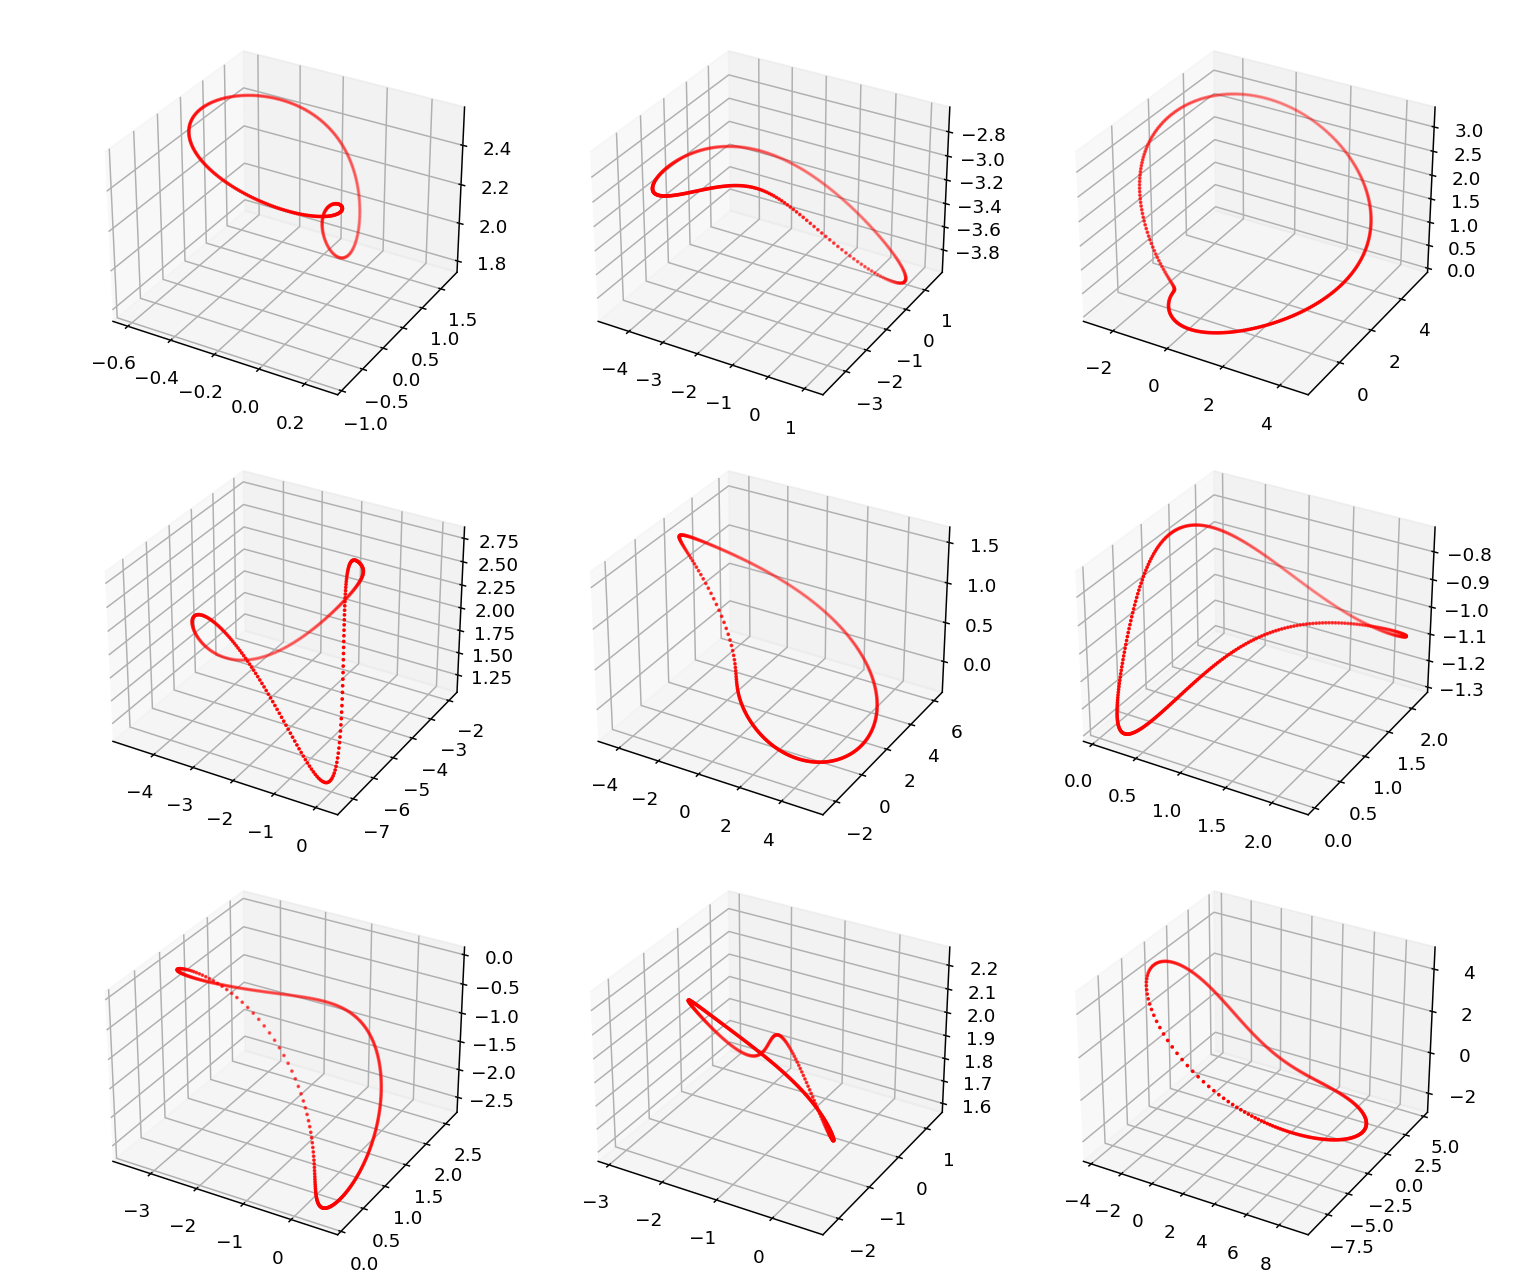

In [11]:
#Random plot some curves to review
fig = plt.figure(figsize=2*plt.figaspect(5/6))

rand_show = np.random.randint(len(path_data), size=9)
inx=1
for num in rand_show:
    ax = fig.add_subplot(3, 3, inx, projection='3d')
    plotPath(path_data[num,:],color = 'red',linestyle = 'point1')
    #plotPath(path_data[num,:],color = 'gray',linestyle = 'line1')
    inx += 1
plt.tight_layout()
plt.show()

# Convert to B-Spline
b样条插值的原因：
1. 让数据点均匀分布
2. 可以控制数据点的数量

但会不会影响normalization呢？

In [12]:
#Evaluate the smooth factor of bspline
def Coordinate_meansquared(y1,y2):
    MSE = 0;
    sub = np.subtract(y1,y2);
    l = len(sub[0]);
    for i in range(l-1):
        diff = math.sqrt(sub[0,i]**2 + sub[1,i]**2 + sub[2,i]**2)
        MSE += diff
    MSE = MSE/l
    return MSE

In [13]:
def Path_Interpolate(path, num_pts=100, smooth=0.01):
    px = path[:,0]
    py = path[:,1]
    pz = path[:,2]
    
    px = np.append(px,px[0]);
    py = np.append(py,py[0]);
    pz = np.append(pz,pz[0]);
    
    tck, u = splprep([px,py,pz],s=smooth) #splprep 给出插值结果y，splev用前者给出的新插值函数y，用输入的新节点x_new找到对应y值
    print(tck)
    print('-----')
    print(u)
    u_fine = np.linspace(0,1,num_pts)
    new_points = splev(u_fine,tck)
    #nx, ny, nz = splev(u,tck)
    
    return new_points

In [14]:
from tqdm.notebook import tqdm

In [ ]:
# convert path to bspline path
path_bspline = [];
for i in tqdm(range(len(path_data))):
    path_temp = Path_Interpolate(path_data[i], num_pts=100)
    path_bspline.append(path_temp)
    
path_bspline = np.array(path_bspline, dtype='float64')


In [ ]:
#save bspline
#np.save("C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\new\\0_path_data_bspline_100.npy",path_bspline)

<IPython.core.display.Javascript object>


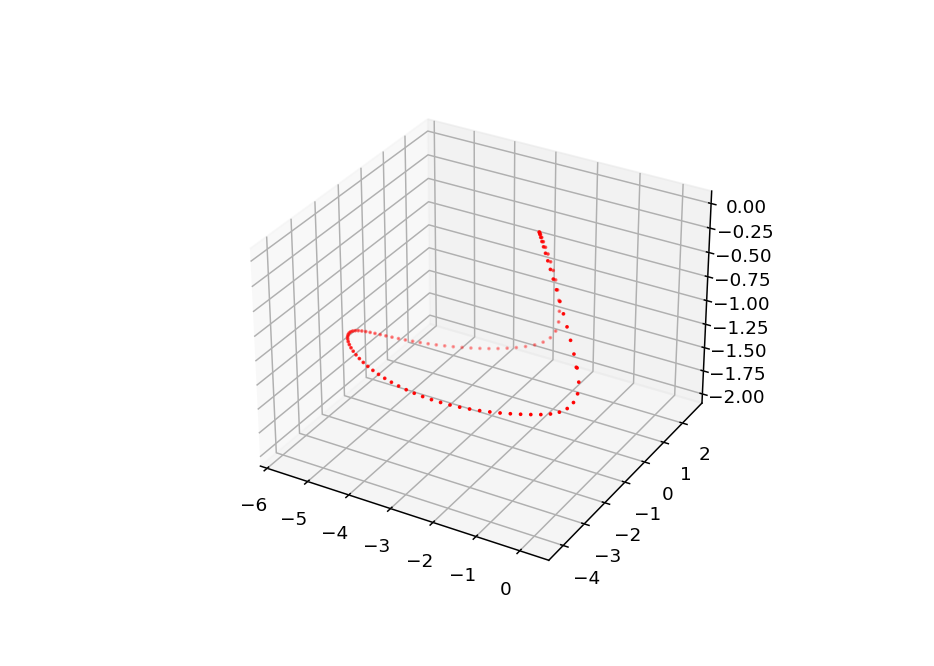

In [18]:
#plot a random
rand = np.random.randint(len(path_bspline))
fig = plt.figure(figsize=(7,5))
ax = plt.axes(projection='3d')
#plotPath(path_bspline[np.random.randint(len(path_bspline)),:],color = 'red',linestyle = 'point')
plotPath(path_bspline[rand,:],color = 'red',linestyle = 'point2')
#plotPath(path_data[rand,:])
plt.show()
#plt.savefig("bspline_curve.jpg")
#plt.savefig("bspline_curve.pdf")

<IPython.core.display.Javascript object>


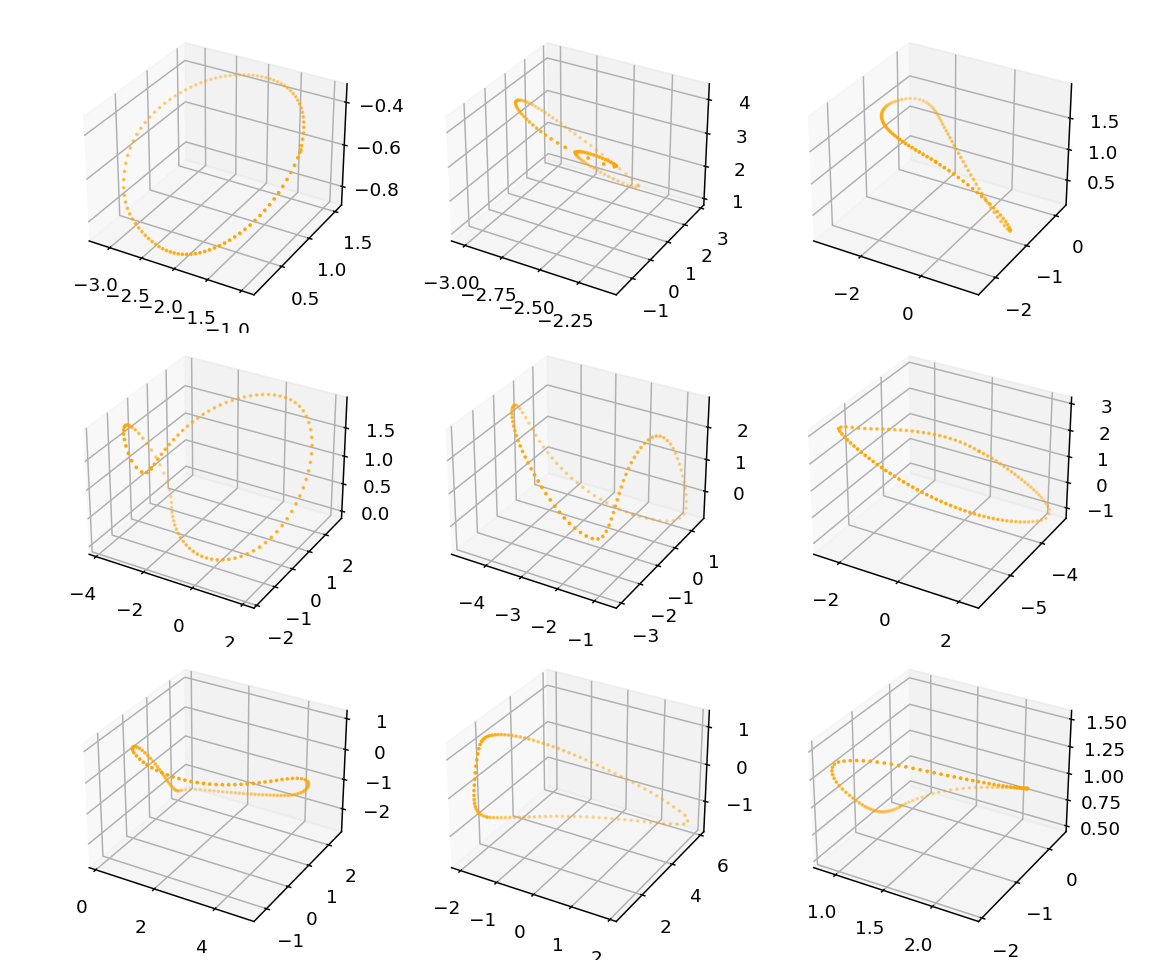

In [20]:
#Random plot some curves to review
fig = plt.figure(figsize=1.5*plt.figaspect(5/6))

rand_show = np.random.randint(len(path_bspline), size=9)
inx=1
for num in rand_show:
    ax = fig.add_subplot(3, 3, inx, projection='3d')
    plotPath(path_bspline[num,:],color = 'orange',linestyle = 'point2')
    #plotPath(path_data[num,:],color = 'gray',linestyle = 'line1')
    inx += 1
#     ax.set_xlim(-2,2)
#     ax.set_ylim(-2,2)
#     ax.set_zlim(-2,2)
plt.tight_layout()
plt.show()

# Normalize - Translation, Rotating, Reflection,Scaling
- Translation: Average of all points moved to origin.
- Rotation: Principal axes rotated to align with x-axis
- Reflection: The PCA rotation can NOT make a unique rotation, there will be 8 different results after rotation. To pick a unique result, we add reflection step here. (ref: Geometric Invariant Curve and Surface Normalization)
- Scaling: All curves are divided by arclength and normalized to unit length (sideaffect: max range is -.5 to .5)
- Parametrization Direction: Start point of the open curve is selected to have larger x-coordinate

In [21]:
def reflect_data_3d(path):
    x = path[0,:]
    y = path[1,:]
    z = path[2,:]
    
    x_r = (x - np.mean(x))**3
    y_r = (y - np.mean(y))**3
    z_r = (z - np.mean(z))**3
    
    m11 = np.sum(x_r) / len(x_r) #x_e
    m12 = np.sum(y_r) / len(y_r) #y_e
    m13 = np.sum(z_r) / len(z_r) #z_e
    
    signm11 = np.sign(m11)
    signm12 = np.sign(m12)
    signm13 = np.sign(m13)
    
#     if np.abs(signm11) < 1e-5:
#         signm11 = 1
#     if np.abs(signm12) < 1e-5:
#         signm12 = 1
#     if np.abs(signm13) < 1e-5:
#         signm13 = 1
    
    reflectionMat = np.array(
    [[signm11, 0, 0],
     [0, signm12, 0],
     [0, 0, signm13]
    ])
    
    if np.abs(m11) < np.abs(m13) and np.abs(m13) < np.abs(m12):
        reflectionMat = np.matmul(np.array([[1,0,0],[0,0,1],[0,1,0]]), reflectionMat)
    elif np.abs(m12) < np.abs(m11) and np.abs(m11) < np.abs(m13):
        reflectionMat = np.matmul(np.array([[0,1,0],[1,0,0],[0,0,1]]), reflectionMat)
    elif np.abs(m12) < np.abs(m13) and np.abs(m13) < np.abs(m11):
        reflectionMat = np.matmul(np.array([[0,1,0],[0,0,1],[1,0,0]]), reflectionMat)
    elif np.abs(m13) < np.abs(m11) and np.abs(m11) < np.abs(m12):
        reflectionMat = np.matmul(np.array([[0,0,1],[1,0,0],[0,1,0]]), reflectionMat)
    elif np.abs(m13) < np.abs(m12) and np.abs(m12) < np.abs(m11):
        reflectionMat = np.matmul(np.array([[0,0,1],[0,1,0],[1,0,0]]), reflectionMat)
        
    reflected_curve = np.matmul(reflectionMat,path)
    
    return reflected_curve, reflectionMat

In [22]:
# Calculate the total arc length of a 3D curve
def calcArcLen(path):
    ArcLen=0
    path_t = path.T
    for j in range(0,len(path_t)-1):
        d=np.linalg.norm(path_t[j]-path_t[j+1])
        ArcLen+=d
    ArcLen += np.linalg.norm(path_t[-1]-path_t[0])
    return ArcLen


# Normolize path with reflection
def normalizePath(path):
    #Translation
    trans = np.mean(path,axis=1)
    trans_path = np.transpose(np.transpose(path) - trans) #tans_path size: 3*num
                            
    #Rotation
    cov_mat = np.cov(trans_path) # calculate covariance matrix
    eig_val,eig_vec = np.linalg.eigh(cov_mat)
    if np.linalg.det(eig_vec) <= 0:
        eig_vec = -eig_vec
    rot = np.linalg.inv(eig_vec)
    rot_path = np.matmul(rot,trans_path)
    #eigen = np.linalg.svd(trans_path.T)[2] #V^T, each row is a eigenvector
    #rot_path2 = np.matmul(np.linalg.inv(eigen.T),trans_path)
    
    #reflection
    reflec_path, reflect_matrix = reflect_data_3d(rot_path)
    re_rot = np.matmul(reflect_matrix,rot)
    
    #Scaling
    scale =calcArcLen(reflec_path)
    #scale = scale1/100
    #scale = 1
    
    norm_path=reflec_path/scale

    return norm_path, trans, re_rot, scale

In [23]:
# Normalize Mechanism
def normalizeMec(mec, trans, rot, scale):
    # Translation
    trans_mec = copy.deepcopy(mec)
    trans_mec[0,:] = mec[0,:]-trans
    trans_mec[1,:] = mec[1,:]-trans
    trans_mec[2,:] = mec[2,:]-trans
    trans_mec[5,:] = mec[5,:]-trans
    trans_mec[6,:] = mec[6,:]-trans
    trans_mec[8,:] = mec[8,:]-trans
    trans_mec = np.transpose(trans_mec)    
    
    #Rotation
    rot_mec = np.transpose(np.matmul(rot, trans_mec))
    
    #Scaling
    rot_mec[0,:] = rot_mec[0,:]/scale
    rot_mec[1,:] = rot_mec[1,:]/scale
    rot_mec[2,:] = rot_mec[2,:]/scale
    rot_mec[5,:] = rot_mec[5,:]/scale
    rot_mec[6,:] = rot_mec[6,:]/scale
    rot_mec[8,:] = rot_mec[8,:]/scale  
    
    return rot_mec

In [24]:
# Normalize Mechanism
def normalizeMec_with5(mec, trans, rot, scale):
    # Translation
    trans_mec = copy.deepcopy(mec)
    trans_mec[0,:] = mec[0,:]-trans
    trans_mec[1,:] = mec[1,:]-trans
    trans_mec[2,:] = mec[2,:]-trans
    trans_mec[5,:] = mec[5,:]-trans
    trans_mec[6,:] = mec[6,:]-trans
    trans_mec[7,:] = mec[7,:]-trans
    trans_mec[9,:] = mec[9,:]-trans
    trans_mec = np.transpose(trans_mec)    
    
    #Rotation
    rot_mec = np.transpose(np.matmul(rot, trans_mec))
    
    #Scaling
    rot_mec[0,:] = rot_mec[0,:]/scale
    rot_mec[1,:] = rot_mec[1,:]/scale
    rot_mec[2,:] = rot_mec[2,:]/scale
    rot_mec[5,:] = rot_mec[5,:]/scale
    rot_mec[6,:] = rot_mec[6,:]/scale
    rot_mec[7,:] = rot_mec[7,:]/scale
    rot_mec[9,:] = rot_mec[9,:]/scale  
    
    return rot_mec

In [25]:
# Normalize path by translation and rotation
path_normalized = [];
mec_normalized = [];

for i in tqdm(range(len(path_bspline))):
    path_temp, trans, rot, scale = normalizePath(path_bspline[i])
    mec_temp = normalizeMec(mec_data[i], trans, rot, scale)
    path_normalized.append(path_temp)
    mec_normalized.append(mec_temp)
    
winsound.Beep(440,1500)

  0%|          | 0/3086 [00:00<?, ?it/s]

In [26]:
path_normalized = np.array(path_normalized)
mec_normalized = np.array(mec_normalized)

In [ ]:
# Normalize path by translation and rotation
path_normalized = [];
mec_normalized = [];
mec_normalized_vec = [];
Scale = []

for i in tqdm(range(len(path_bspline))):
    path_temp, trans, rot, scale = normalizePath(path_bspline[i])
    mec_temp = normalizeMec(mec_data[i], trans, rot, scale)
    mec_temp2 = normalizeMec_scalevector(mec_data[i], trans, rot, scale)
    Scale.append(1/scale)
    path_normalized.append(path_temp)
    mec_normalized.append(mec_temp)
    mec_normalized_vec.append(mec_temp2)
    
winsound.Beep(440,1500)
#path_normalized = np.array(path_normalized, dtype='float32')
#mec_normalized = np.array(mec_normalized, dtype='float32')

In [ ]:
# Normalize path by translation and rotation
path_normalized_vec = [];
mec_normalized_vec = [];

for i in tqdm(range(len(path_bspline))):
    path_temp2, trans, rot, scale = normalizePath_scalevector(path_bspline[i])
    mec_temp2 = normalizeMec_scalevector(mec_data[i], trans, rot, scale)
    path_normalized_vec.append(path_temp2)
    mec_normalized_vec.append(mec_temp2)
    
winsound.Beep(440,1500)

In [ ]:
mec_normalized_1 = np.load("C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\3_555_Different_Ratio\\1_Mec_555_7p.npy");
mec_normalized_2 = np.load("C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\3_555_Different_Ratio\\2_Mec_555_7p.npy");
mec_normalized_3 = np.load("C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\3_555_Different_Ratio\\3_Mec_555_7p.npy");

In [ ]:
mec_normalized_1[0]

In [ ]:
mec_normalized_2[0]

In [ ]:
mec_normalized_3[0]

In [ ]:
mec_normalized_vec[0]

<IPython.core.display.Javascript object>


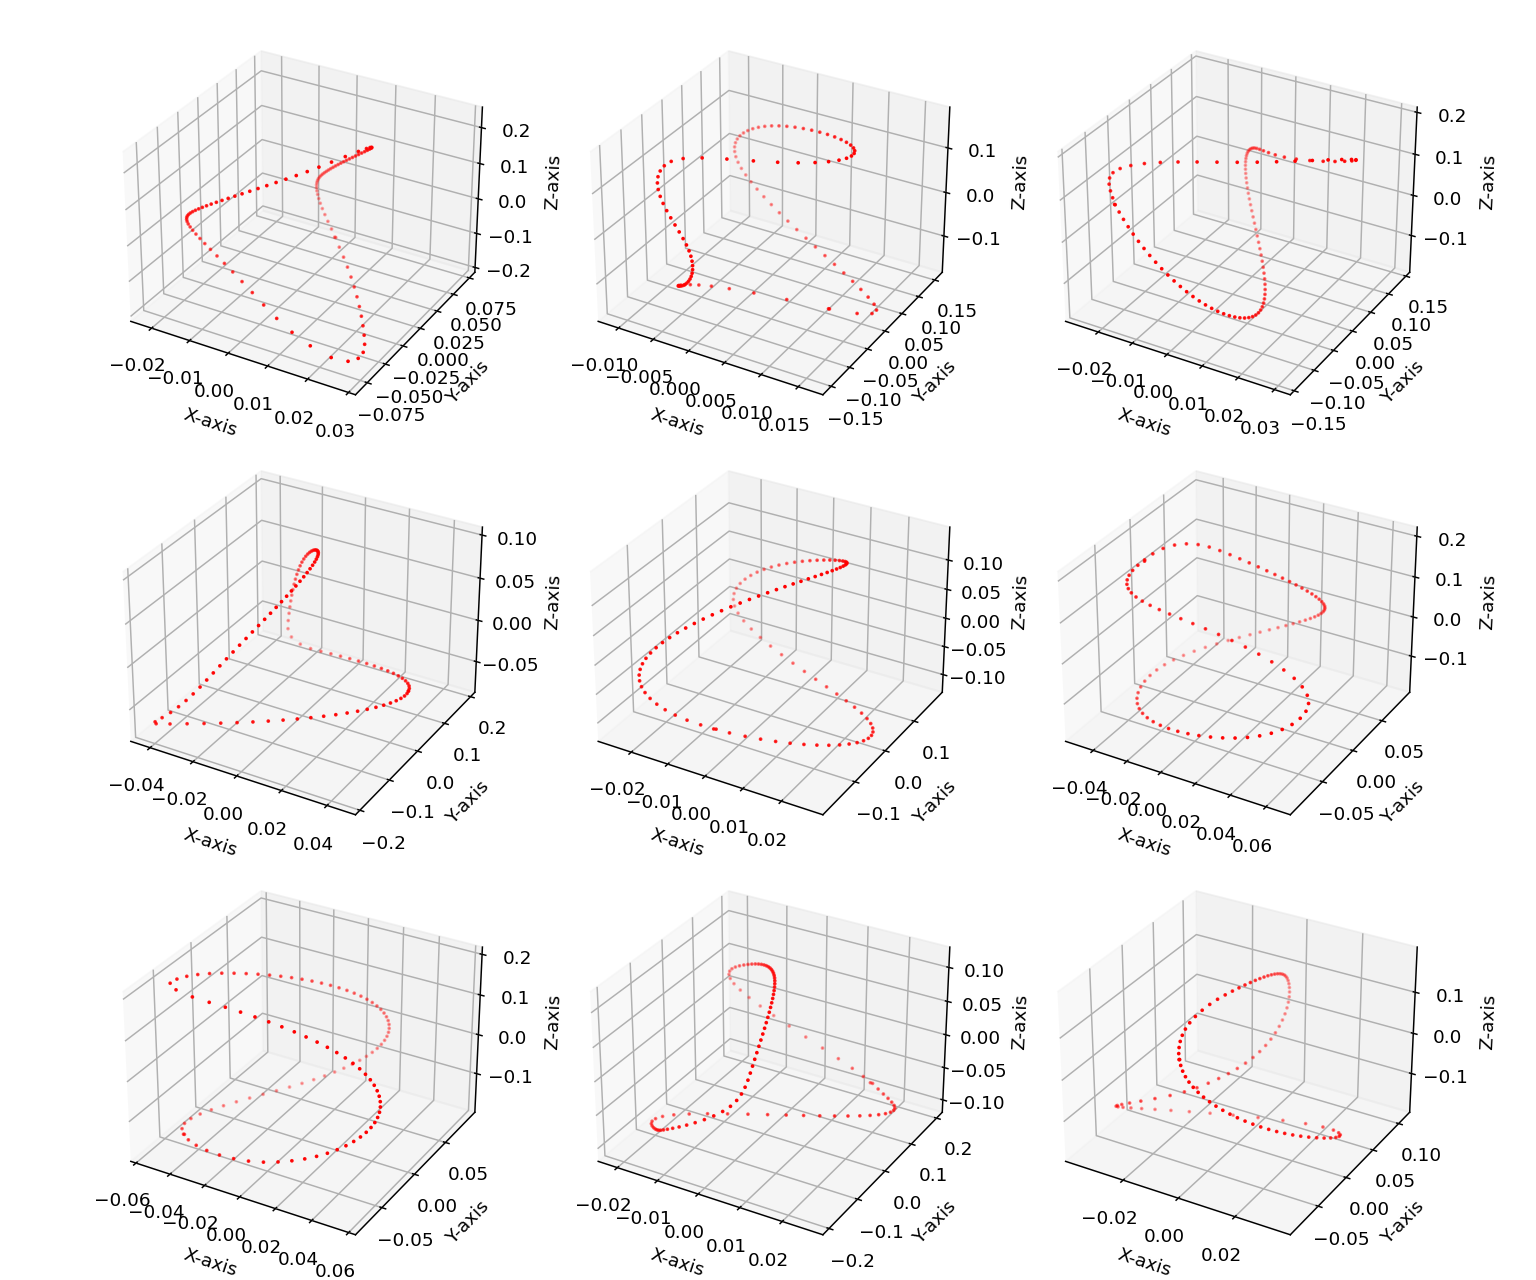

[2779 2091  728 2877 1748  632 1542  173  541]


In [29]:
#Random plot some curves to review
fig = plt.figure(figsize=2*plt.figaspect(5/6))

rand_show = np.random.randint(len(path_normalized), size=9)
inx=1
for num in rand_show:
    ax = fig.add_subplot(3, 3, inx, projection='3d')
    plotPath(path_normalized[num],color = 'red',linestyle = 'point2')
    inx += 1
    #ax.set_xlim(-3,3)
    #ax.set_ylim(-3,3)
    #ax.set_zlim(-3,3)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.tight_layout()
plt.show()
print(rand_show)

<IPython.core.display.Javascript object>


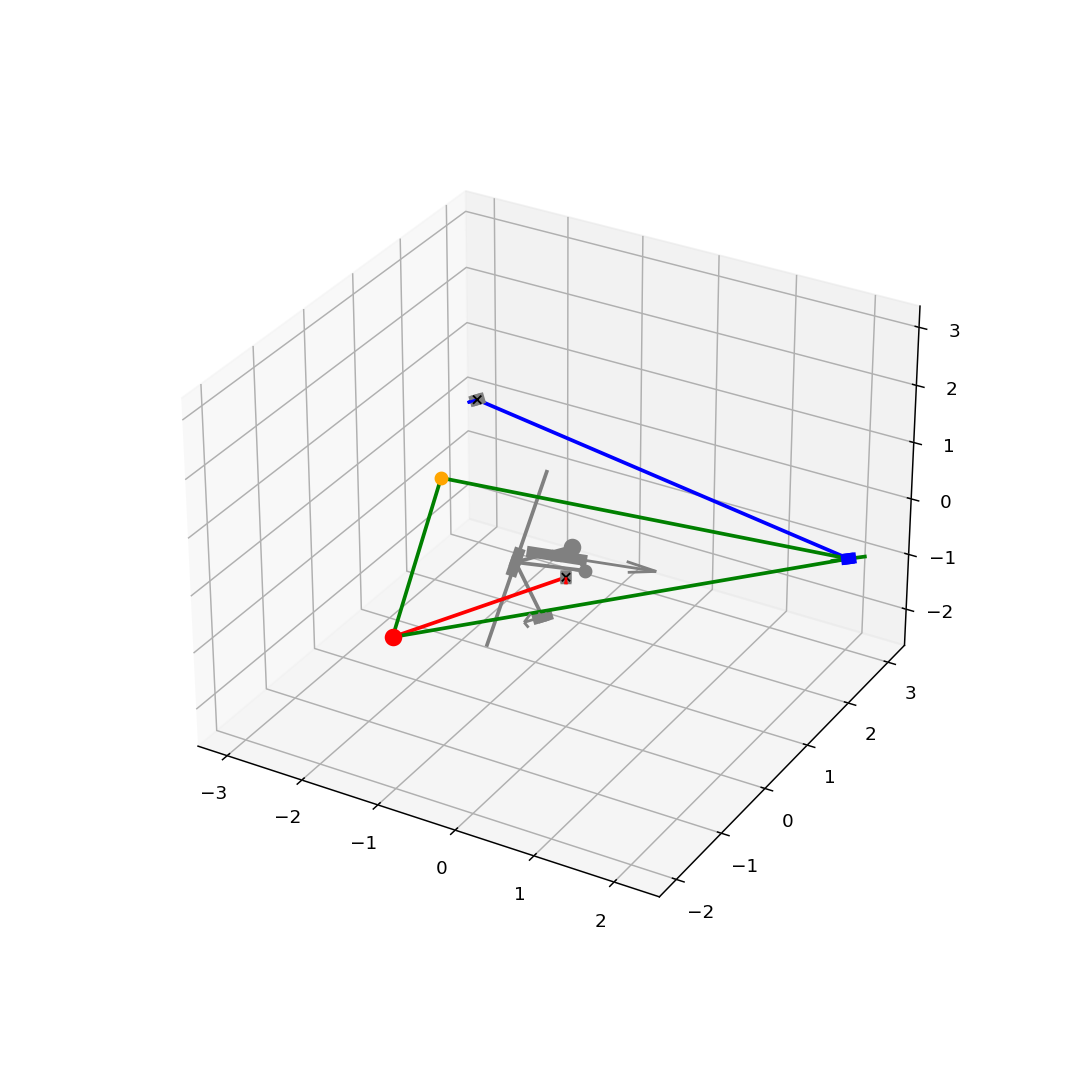

2714


In [30]:
#random plot a mec and it's path
#rand_show = np.random.randint(len(path_normalized))
rand_show = np.random.randint(len(path_normalized))
fig= plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1, projection='3d')
plotMec_RSCR_onecolor(3*mec_normalized[rand_show])
plotMec_RSCR(mec_data[rand_show])

print(rand_show)

In [ ]:
fig= plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1, projection='3d')
plotPath(path_normalized[rand_show],color = 'red',linestyle = 'line2')

# Hide grid lines
ax.grid(False)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_zlim(-0.5,0.5)


In [ ]:
#random plot a mec and it's path
#rand_show = np.random.randint(len(path_normalized))
#rand_show = np.random.randint(len(path_normalized))
fig= plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1, projection='3d')
plotPath(path_normalized[rand_show],color = 'red',linestyle = 'line2')
plotMec_RSCR(mec_normalized[rand_show])
ax.grid(False)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_zlim(-0.5,0.5)


In [ ]:
rand_show = np.random.randint(len(path_normalized))

In [ ]:
rand_show=205

rand_show = 205

In [ ]:
fig= plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1, projection='3d')
plotMec_RSCR(mec_data[rand_show])
ax.set_xlim(-1.5,1)
ax.set_ylim(-2,1.5)
ax.set_zlim(-1.5,1)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

In [ ]:
fig= plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1, projection='3d')
plotPath(path_bspline[rand_show],color = 'red',linestyle = 'line2')
plotMec_RSCR(mec_data[rand_show])
ax.set_xlim(-1.5,1)
ax.set_ylim(-2,1.5)
ax.set_zlim(-1.5,1)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

In [ ]:
fig= plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1, projection='3d')
plotPath(path_bspline[rand_show],color = 'red',linestyle = 'point2')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_zlim(-0.5,0.5)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

In [ ]:
fig= plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1, projection='3d')
plotPath(path_data[rand_show],color = 'red',linestyle = 'point1', dot_size=0.5)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.set_xlim(-1.5,0)
ax.set_ylim(0,1.5)
ax.set_zlim(-1,0.5)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

In [ ]:
fig= plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1, projection='3d')
plotPath(path_normalized[rand_show],color = 'red',linestyle = 'point2')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.set_xlim(-0.2,0.2)
ax.set_ylim(-0.2,0.2)
ax.set_zlim(-0.2,0.2)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')


In [ ]:
%run "C:\SBU-3\Jupyter-Research\RSCR\Functions.ipynb"

In [ ]:
53

In [ ]:
# random plot a mec and it's path
rand_show = np.random.randint(len(path_data))
rand_show = 53
fig= plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 2, 1, projection='3d')
plotPath(path_data[rand_show],color = 'red',linestyle = 'point1')
plotMec_RSCR(mec_data[rand_show])
ax.view_init(elev=35, azim=60)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.grid(False)

ax = plt.subplot(1, 2, 2, projection='3d')
plotPath(path_normalized[rand_show],color = 'red',linestyle = 'point2')
plotMec_RSCR(mec_normalized[rand_show])
ax.view_init(elev=35, azim=60)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.grid(False)
print(rand_show)

In [ ]:
#random plot a mec and it's path
#rand_show = np.random.randint(len(path_normalized))
#rand_show = np.random.randint(len(path_normalized))
fig= plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1, projection='3d')
#plotPath(path_normalized[rand_show],color = 'red',linestyle = 'point2')
plotMec_RSCR(mec_normalized[124])
ax.set_axis_off()

ax.set_xlim(-0.2,0.4)
ax.set_ylim(-0.4,0.2)
ax.set_zlim(-0.4,0.2)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
#ax = plt.subplot(1, 2, 2, projection='3d')
#plotPath(path_normalized[rand_show],color = 'orange',linestyle = 'point2')
#plotMec_RSCR(10*mec_normalized[rand_show])


In [ ]:
fig= plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1, projection='3d')
plotPath(path_data[rand_show],color = 'red',linestyle = 'point1')
plotMec_RSCR(mec_data[rand_show])
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])


In [ ]:
mec_data[345]

In [ ]:
mec2 = np.delete(mec_data,(0,1,3), axis=1)

In [ ]:
mec2[345]

In [ ]:
np.save("C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\777\\5_Mec_777_7p.npy",mec2) # n*9*3|

In [ ]:
mec3 = []
for i in range(len(mec2)):
    temp = mec2[i].flatten()
    temp2 = np.delete(temp,(2,8), axis = 0)
    mec3.append(temp2)

In [ ]:
mec3 = np.array(mec3)

In [ ]:
mec3[345]

In [ ]:
mec_t[324]

In [ ]:
mec2[0].flatten()

In [ ]:
mec2[0]

In [ ]:
mec3[0]

In [ ]:
mec_t = np.load("C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\777\\4_Mec_777_16.npy")

In [ ]:
np.save("C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\TEST\\mec_16_120.npy",mec3) # n*9*3

In [ ]:
np.save("C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\777\\1_Mec777_4_vec.npy",mec_normalized_vec) # n*9*3
np.save("C:\SBU-3\Jupyter-Research\RSCR\Saved Data\\777\\1_Path777_4_vec.npy",path_normalized_vec) #n*3*100

# -----------------------TEST Normalization-----------------------------------

In [ ]:
#verify bspline
rand_show = np.random.randint(len(path_data))
path_data_t = path_data[rand_show]

path_data_t1 = path_data_t[0:359:2,:]
path_data_t2 = path_data_t[1:359:2,:]

path_bspline_t1 = Path_Interpolate(path_data_t1)
path_bspline_t2 = Path_Interpolate(path_data_t2)
path_bspline_t1 = np.array(path_bspline_t1, dtype='float64')
path_bspline_t2 = np.array(path_bspline_t2, dtype='float64')

fig = plt.figure(figsize=(7,5))
ax = plt.axes(projection='3d')
#plotPath(path_bspline[np.random.randint(len(path_bspline)),:],color = 'red',linestyle = 'point')
plotPath(path_data[rand_show],color = 'gray',linestyle = 'line1')
plotPath(path_bspline[rand_show,:],color = 'yellow',linestyle = 'point2')
plotPath(path_bspline_t1,color = 'red',linestyle = 'point2')
plotPath(path_bspline_t2,color = 'blue',linestyle = 'point2')
plt.show()

In [ ]:
rand_show = np.random.randint(len(mec_normalized))
target_mec = mec_normalized[rand_show]
print(rand_show)

In [ ]:
from scipy.optimize import root

In [ ]:
target_mec

In [ ]:
Fixed_para = target_mec[:5]

step = 360; # this step decides how to devide 2pi

Initial_pos_3 = target_mec[5]
Initial_pos_4 = target_mec[6]
Initial_pos_5 = target_mec[7]
Initial_u5 = target_mec[8]
Initial_6 = target_mec[9]

config_para = ComputeConfig(Fixed_para, Initial_pos_3, Initial_pos_4, Initial_u5);

Initial_guess = Initial_pos_4, Initial_pos_5, Initial_u5;
Initial_para = Initial_guess;
Initial_para, condition = solve_equations(Fixed_para, config_para, Initial_guess, Initial_pos_3);

if condition == False:
    print("Initial wrong")
    
    
phi = 0;
step_pos_3 = np.zeros((step,3), dtype=np.float64); # store every position of point_3
step_para = np.zeros((step,9), dtype=np.float64); # store every solution

#store the initial data
step_pos_3[0,:] = Initial_pos_3;
step_para[0,:] = np.reshape(Initial_para,(1,9));

u_13 = np.append(0, Initial_pos_3) - np.append(0,Fixed_para[1]);

for i in range(step-1):  
    phi = phi + 360/step;

    #below calculate the next position of 3 by quaternion
    theta = np.pi*phi/360; #thera is half of phi
    rotation_quater = np.array([np.cos(theta), np.sin(theta)*Fixed_para[3,0], np.sin(theta)*Fixed_para[3,1], np.sin(theta)*Fixed_para[3,2]]);#the quaternion of rotation
    new_u_13 = QuaterTimes(QuaterTimes(rotation_quater,u_13),QuaterConj(rotation_quater));
    new_pos_3 = new_u_13[1:4] + Fixed_para[1,:];
    step_pos_3[i+1,:] = new_pos_3;

    temp_solution, condition = solve_equations(Fixed_para, config_para, step_para[i,:], new_pos_3);

    if condition == True:
        step_para[i+1,:] = np.reshape(temp_solution,(1,9));
    else:
        print("no full rotation");
        #print(i)
        break

In [ ]:
i

In [ ]:
Fixed_para = target_mec[:5]

step = 360; # this step decides how to devide 2pi

Initial_pos_3 = target_mec[5]
Initial_pos_4 = target_mec[6]
Initial_u5 = target_mec[7]
Initial_6 = target_mec[8]

config_para = ComputeConfig_with_coupler(Fixed_para, Initial_pos_3, Initial_pos_4, Initial_u5, Initial_6);

Initial_guess = Initial_pos_4, Initial_pos_4, Initial_u5, Initial_6;
#Initial_para = Initial_guess;
Initial_para, condition = solve_equations_with_coupler(Fixed_para, config_para, Initial_guess, Initial_pos_3);

if condition == False:
    print("Initial wrong")
    
    
phi = 0;
step_pos_3 = np.zeros((step,3), dtype=np.float64); # store every position of point_3
step_para = np.zeros((step,12), dtype=np.float64); # store every solution

#store the initial data
step_pos_3[0,:] = Initial_pos_3;
step_para[0,:] = np.reshape(Initial_para,(1,12));

u_13 = np.append(0, Initial_pos_3) - np.append(0,Fixed_para[1]);

for i in range(step-1):  
    phi = phi + 360/step;

    #below calculate the next position of 3 by quaternion
    theta = np.pi*phi/360; #thera is half of phi
    rotation_quater = np.array([np.cos(theta), np.sin(theta)*Fixed_para[3,0], np.sin(theta)*Fixed_para[3,1], np.sin(theta)*Fixed_para[3,2]]);#the quaternion of rotation
    new_u_13 = QuaterTimes(QuaterTimes(rotation_quater,u_13),QuaterConj(rotation_quater));
    new_pos_3 = new_u_13[1:4] + Fixed_para[1,:];
    step_pos_3[i+1,:] = new_pos_3;

    temp_solution, condition = solve_equations_with_coupler(Fixed_para, config_para, step_para[i,:], new_pos_3);

    if condition == True:
        step_para[i+1,:] = np.reshape(temp_solution,(1,12));
    else:
        print("no full rotation");
        #print(i)
        break

In [ ]:
target_path = step_para[:,9:]

fig= plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1, projection='3d')

plotPath(path_normalized[rand_show],color = 'orange',linestyle = 'point2')
plotMec_RSCR(target_mec)

plotPath(target_path,color = 'gray',linestyle = 'point1')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

In [ ]:
# random plot a mec and it's path
fig= plt.figure(figsize=(8, 8))
ax.set_box_aspect([1,1,1])
ax = plt.subplot(1, 2, 1, projection='3d')
plotPath(path_data[rand_show],color = 'orange')
plotMec_RSCR(mec_data[rand_show])

ax.set_xlim(-1,5)
ax.set_ylim(-1,5)
ax.set_zlim(-5,1)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')


ax = plt.subplot(1, 2, 2, projection='3d')
plotPath(10*path_normalized[rand_show],color = 'orange',linestyle = 'point2')
plotMec_RSCR(10*mec_normalized[rand_show])
ax.set_xlim(-30,10)
ax.set_ylim(-30,10)
ax.set_zlim(-30,10)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

print(rand_show)

# ----------------------------TEST DONE-------------------------------------------
# --------------------------TEST PATH REFLECTION -----------------------------------------

In [ ]:
# Randomly rotate a path
def randomRotatePath(path):
    alpha = np.arange(0,360,60)
    beta = np.arange(0,360,60)
    gamma = np.arange(0,360,60)
    
    rot_path = []
    
    for a in alpha:
        alpha_r = np.array([[1,0,0],[0,np.cos(a),-np.sin(a)],[0,np.sin(a),np.cos(a)]])
        for b in beta:
            beta_r = np.array([[np.cos(b),0,np.sin(b)],[0,1,0],[-np.sin(b),0,np.cos(b)]])
            for y in gamma:
                gamma_r = np.array([[np.cos(y),-np.sin(y),0],[np.sin(y),np.cos(y),0],[0,0,1]])
                rotation_m = np.matmul(np.matmul(gamma_r,beta_r),alpha_r)
                new_path = np.matmul(rotation_m,path)
                rot_path.append(new_path)
    
    return rot_path

In [ ]:
rot_path = randomRotatePath(path_bspline[8435])
np.shape(rot_path)

In [ ]:
#Random plot some curves to review
fig =plt.figure(figsize=(10,15))
inx=1
for i in range(0,216,10):
    ax = fig.add_subplot(6,4,inx, projection='3d')
    plotPath(rot_path[i],color = 'red',linestyle = 'point2')
    inx += 1
plt.show()

In [ ]:
# Calculate the total arc length of a 3D curve
def calcArcLen(path):
    ArcLen=0
    path_t = path.T
    for j in range(0,len(path_t)-1):
        d=np.linalg.norm(path_t[j]-path_t[j+1])
        ArcLen+=d
    ArcLen += np.linalg.norm(path_t[-1]-path_t[0])
    return ArcLen

# Normolize path
def normalizePath(path):
    #Translation
    trans = np.mean(path,axis=1)
    trans_path = np.transpose(np.transpose(path) - trans) #tans_path size: 3*num
                            
    #Rotation
    cov_mat = np.cov(trans_path) # calculate covariance matrix
    eig_val,eig_vec = np.linalg.eigh(cov_mat)
    if np.linalg.det(eig_vec) <= 0:
        eig_vec = -eig_vec
    rot = np.linalg.inv(eig_vec)
    rot_path = np.matmul(rot,trans_path)
    #eigen = np.linalg.svd(trans_path.T)[2] #V^T, each row is a eigenvector
    #rot_path2 = np.matmul(np.linalg.inv(eigen.T),trans_path)
    
    #Scaling
    scale =calcArcLen(rot_path)/10
    norm_path=rot_path/scale

    return norm_path, trans, rot, scale


In [ ]:
new_path = [];
for rot in rot_path:
    path_temp, trans, rot, scale = normalizePath(rot)
    new_path.append(path_temp)

In [ ]:
#Random plot some curves to review
fig =plt.figure(figsize=(10,15))
inx=1
for i in range(0,216,10):
    ax = fig.add_subplot(6,4,inx, projection='3d')
    plotPath(new_path[i],color = 'red',linestyle = 'point2')
    inx += 1
plt.show()

In [ ]:
def reflect_data_3d(path):
    x = path[0,:]
    y = path[1,:]
    z = path[2,:]
    
    x_r = (x - np.mean(x))**3
    y_r = (y - np.mean(y))**3
    z_r = (z - np.mean(z))**3
    
    m11 = np.sum(x_r) / len(x_r) #x_e
    m12 = np.sum(y_r) / len(y_r) #y_e
    m13 = np.sum(z_r) / len(z_r) #z_e
    
    signm11 = np.sign(m11)
    signm12 = np.sign(m12)
    signm13 = np.sign(m13)
    
#     if np.abs(signm11) < 1e-5:
#         signm11 = 1
#     if np.abs(signm12) < 1e-5:
#         signm12 = 1
#     if np.abs(signm13) < 1e-5:
#         signm13 = 1
    
    reflectionMat = np.array(
    [[signm11, 0, 0],
     [0, signm12, 0],
     [0, 0, signm13]
    ])
    
    if np.abs(m11) < np.abs(m13) and np.abs(m13) < np.abs(m12):
        reflectionMat = np.matmul(np.array([[1,0,0],[0,0,1],[0,1,0]]), reflectionMat)
    elif np.abs(m12) < np.abs(m11) and np.abs(m11) < np.abs(m13):
        reflectionMat = np.matmul(np.array([[0,1,0],[1,0,0],[0,0,1]]), reflectionMat)
    elif np.abs(m12) < np.abs(m13) and np.abs(m13) < np.abs(m11):
        reflectionMat = np.matmul(np.array([[0,1,0],[0,0,1],[1,0,0]]), reflectionMat)
    elif np.abs(m13) < np.abs(m11) and np.abs(m11) < np.abs(m12):
        reflectionMat = np.matmul(np.array([[0,0,1],[1,0,0],[0,1,0]]), reflectionMat)
    elif np.abs(m13) < np.abs(m12) and np.abs(m12) < np.abs(m11):
        reflectionMat = np.matmul(np.array([[0,0,1],[0,1,0],[1,0,0]]), reflectionMat)
        
    reflected_curve = np.matmul(reflectionMat,path)
    
    return reflected_curve, reflectionMat

In [ ]:
new_path = [];
for rot in rot_path:
    path_temp, trans, rot, scale = normalizePath(rot)
    new_path.append(path_temp)

In [ ]:
reflect_path = [];
for rot in rot_path:
    path_temp, trans, rot, scale = normalizePath(rot)
    path_re,_ = reflect_data_3d(path_temp)
    reflect_path.append(path_re)

In [ ]:
#Random plot some curves to review
fig =plt.figure(figsize=(10,15))
inx=1
for i in range(0,216,10):
    ax = fig.add_subplot(6,4,inx, projection='3d')
    plotPath(reflect_path[i],color = 'red',linestyle = 'point2')
    inx += 1
plt.show()

# ----------------------------TEST DONE-------------------------------------------
# --------------------TEST PATH & MEC REFLECTION -----------------------------------

In [ ]:
# Randomly rotate a path with mec
def randomRotatePathandMec(path,mec):
    alpha = np.arange(0,360,60)
    beta = np.arange(0,360,60)
    gamma = np.arange(0,360,60)
    
    rot_path = []
    rot_mec = []
    
    for a in alpha:
        alpha_r = np.array([[1,0,0],[0,np.cos(a),-np.sin(a)],[0,np.sin(a),np.cos(a)]])
        for b in beta:
            beta_r = np.array([[np.cos(b),0,np.sin(b)],[0,1,0],[-np.sin(b),0,np.cos(b)]])
            for y in gamma:
                gamma_r = np.array([[np.cos(y),-np.sin(y),0],[np.sin(y),np.cos(y),0],[0,0,1]])
                rotation_m = np.matmul(np.matmul(gamma_r,beta_r),alpha_r)
                new_path = np.matmul(rotation_m,path)
                rot_path.append(new_path)
                
                new_mec = np.transpose(np.matmul(rotation_m, mec.T))
                rot_mec.append(new_mec)
                
    rot_path = np.array(rot_path)
    rot_mec = np.array(rot_mec)
    return rot_path, rot_mec

In [ ]:
rand_show = np.random.randint(len(path_bspline))
rot_path, rot_mec = randomRotatePathandMec(path_bspline[rand_show],mec_data[rand_show])

In [ ]:
#Random plot some curves to review
fig =plt.figure(figsize=(10,15))
inx=1
for i in range(0,216,10):
    ax = fig.add_subplot(6,4,inx, projection='3d')
    plotPath(rot_path[i],color = 'red',linestyle = 'point2')
#     ax.set_xlim(0,6)
#     ax.set_ylim(-6,0)
#     ax.set_zlim(0,4)
#     ax.set_xlabel('X-axis')
#     ax.set_ylabel('Y-axis')
#     ax.set_zlabel('Z-axis')
    inx += 1
plt.show()

In [ ]:
# Normolize path
def normalizePath1(path):
    #Translation
    trans = np.mean(path,axis=1)
    trans_path = np.transpose(np.transpose(path) - trans) #tans_path size: 3*num
                            
    #Rotation
    cov_mat = np.cov(trans_path) # calculate covariance matrix
    eig_val,eig_vec = np.linalg.eigh(cov_mat)
    if np.linalg.det(eig_vec) <= 0:
        eig_vec = -eig_vec
    rot = np.linalg.inv(eig_vec)
    rot_path = np.matmul(rot,trans_path)
    #eigen = np.linalg.svd(trans_path.T)[2] #V^T, each row is a eigenvector
    #rot_path2 = np.matmul(np.linalg.inv(eigen.T),trans_path)
    

    #Scaling
    scale =calcArcLen(rot_path)
    scale = scale/10
    norm_path=rot_path/scale

    return norm_path, trans, rot, scale

In [ ]:
# Normolize path
def normalizePath2(path):
    #Translation
    trans = np.mean(path,axis=1)
    trans_path = np.transpose(np.transpose(path) - trans) #tans_path size: 3*num
                            
    #Rotation
    cov_mat = np.cov(trans_path) # calculate covariance matrix
    eig_val,eig_vec = np.linalg.eigh(cov_mat)
    if np.linalg.det(eig_vec) <= 0:
        eig_vec = -eig_vec
    rot = np.linalg.inv(eig_vec)
    rot_path = np.matmul(rot,trans_path)
    #eigen = np.linalg.svd(trans_path.T)[2] #V^T, each row is a eigenvector
    #rot_path2 = np.matmul(np.linalg.inv(eigen.T),trans_path)
    
    #reflection
    reflec_path, reflect_matrix = reflect_data_3d(rot_path)
    re_rot = np.matmul(reflect_matrix,rot)
    #Scaling
    scale =calcArcLen(reflec_path)
    scale = scale/10
    norm_path=reflec_path/scale

    return norm_path, trans, re_rot, scale


In [ ]:
# Normalize Mechanism
def normalizeMec(mec, trans, rot, scale):
    # Translation
    trans_mec = copy.deepcopy(mec)
    trans_mec[0,:] = mec[0,:]-trans
    trans_mec[1,:] = mec[1,:]-trans
    trans_mec[2,:] = mec[2,:]-trans
    trans_mec[5,:] = mec[5,:]-trans
    trans_mec[6,:] = mec[6,:]-trans
    trans_mec[8,:] = mec[8,:]-trans
    trans_mec = np.transpose(trans_mec)    
    
    #Rotation
    rot_mec = np.transpose(np.matmul(rot, trans_mec))
    
    #Scaling
    rot_mec[0,:] = rot_mec[0,:]/scale
    rot_mec[1,:] = rot_mec[1,:]/scale
    rot_mec[2,:] = rot_mec[2,:]/scale
    rot_mec[5,:] = rot_mec[5,:]/scale
    rot_mec[6,:] = rot_mec[6,:]/scale
    rot_mec[8,:] = rot_mec[8,:]/scale  
    
    return rot_mec

In [ ]:
new_path3 = [];
new_mec3 = [];
for i in range(len(rot_path)):
    path_temp, trans, rot, scale = normalizePath1(rot_path[i])
    mec_temp = normalizeMec(rot_mec[i], trans, rot, scale)
    new_path3.append(path_temp)
    new_mec3.append(mec_temp)
    
new_path3 = np.array(new_path3, dtype='float64')
new_mec3 = np.array(new_mec3, dtype='float64')

In [ ]:
new_path2 = [];
new_mec2 = [];
for i in range(len(rot_path)):
    path_temp, trans, rot, scale = normalizePath2(rot_path[i])
    mec_temp = normalizeMec(rot_mec[i], trans, rot, scale)
    new_path2.append(path_temp)
    new_mec2.append(mec_temp)
    
new_path2 = np.array(new_path2, dtype='float64')
new_mec2 = np.array(new_mec2, dtype='float64')

In [ ]:
#Random plot some curves to review
fig =plt.figure(figsize=(10,15))
inx=1
for i in range(0,216,10):
    ax = fig.add_subplot(6,4,inx, projection='3d')
    plotPath(new_path2[i],color = 'red',linestyle = 'point2')
    inx += 1
plt.show()

In [ ]:
#Random plot some curves to review
fig =plt.figure(figsize=(10,15))
inx=1
for i in range(0,216,10):
    ax = fig.add_subplot(6,4,inx, projection='3d')
    plotPath(new_path3[i],color = 'red',linestyle = 'point2')
    inx += 1
plt.show()